In [1]:
import pandas as pd
%run mirazul_ploting_utils_changed.ipynb

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import numpy as np

In [3]:
df = pd.read_csv('../Preprocessed_data/train.csv')
df.replace(to_replace=' ', value=np.nan, inplace=True)

df1 = pd.read_csv('../Preprocessed_data/test.csv')
df1.replace(to_replace=' ', value=np.nan, inplace=True)

df.rename(columns={
    'INTUBADO': 'INTUBATED',
    'ASMA': 'ASTHMA',
    'HIPERTENSION': 'HYPERTENSION',
    'Age': 'AGE',
    'Sex': 'SEX'
},
          inplace=True)
df1.rename(columns={
    'INTUBADO': 'INTUBATED',
    'ASMA': 'ASTHMA',
    'HIPERTENSION': 'HYPERTENSION',
    'Age': 'AGE',
    'Sex': 'SEX'
},
           inplace=True)
x_train = df.drop(columns=['ICU'])
y_train = df['ICU']
x_test = df1.drop(columns=['ICU'])
y_test = df1['ICU']

In [5]:
df_main = pd.concat([df, df1], axis=0)
df_main

,SEX,INTUBATED,PNEUMONIA,AGE,PREGNANCY,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTRAS_COM,CARDIOVASCULAR,OBESITY,RENAL_CRONICA,SMOKING,ANOTHER_CASE,ANTIGEN_RESULT,ICU
0,0,0.0,0.0,0.348613,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
1,0,1.0,0.0,0.472727,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1
2,0,1.0,0.0,0.527273,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
3,0,1.0,1.0,0.245455,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
4,0,1.0,1.0,0.490909,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,0,0.0,0.0,0.375285,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0
13522,0,1.0,0.0,0.418182,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1
13523,0,1.0,0.0,0.545455,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
13524,0,1.0,0.0,0.636364,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1


In [6]:
x = df_main.drop(columns=['ICU'])
y = df_main['ICU']

In [7]:
df

,SEX,INTUBATED,PNEUMONIA,AGE,PREGNANCY,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTRAS_COM,CARDIOVASCULAR,OBESITY,RENAL_CRONICA,SMOKING,ANOTHER_CASE,ANTIGEN_RESULT,ICU
0,0,0.0,0.0,0.348613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
1,0,1.0,0.0,0.472727,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1
2,0,1.0,0.0,0.527273,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
3,0,1.0,1.0,0.245455,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
4,0,1.0,1.0,0.490909,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27455,0,1.0,0.0,0.609091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
27456,0,1.0,1.0,0.663636,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
27457,0,0.0,0.0,0.354045,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
27458,0,1.0,1.0,0.563636,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0,1


In [8]:
df1

,SEX,INTUBATED,PNEUMONIA,AGE,PREGNANCY,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTRAS_COM,CARDIOVASCULAR,OBESITY,RENAL_CRONICA,SMOKING,ANOTHER_CASE,ANTIGEN_RESULT,ICU
0,0,1.0,1.0,0.300000,0.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1
1,0,1.0,0.0,0.659127,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0
2,0,1.0,1.0,0.436364,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
3,0,0.0,0.0,0.497290,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
4,0,0.0,0.0,0.439655,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,0,0.0,0.0,0.375285,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0
13522,0,1.0,0.0,0.418182,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1
13523,0,1.0,0.0,0.545455,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
13524,0,1.0,0.0,0.636364,1.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,1


In [9]:
import pickle 


In [10]:
HGSOXGB_clf = pickle.load(
    open('../Trained_Models/optimized_xgb_model_usingHGS.sav', 'rb'))
QLDA = pickle.load(open('../Trained_Models/QLDA_covid.sav', 'rb'))
CB = pickle.load(open('../Trained_Models/cat_covid.sav', 'rb'))
GBC = pickle.load(
    open('../Trained_Models/gradient_boosting_classifier_covid.sav', 'rb'))
LR = pickle.load(open('../Trained_Models/logisticReg_covid.sav', 'rb'))
LGBM = pickle.load(open('../Trained_Models/lgbm_covid.sav', 'rb'))
RF = pickle.load(open('../Trained_Models/RF_covid.sav', 'rb'))
LDA_clf = pickle.load(open('../Trained_Models/lda_covid_fmam.sav', 'rb'))
KNN_clf = pickle.load(open('../Trained_Models/knn_covid_fmam.sav', 'rb'))
GBC_clf = pickle.load(open('../Trained_Models/gbc_covid.sav', 'rb'))

In [15]:
proba_dic=dict(
    HGSOXGB= HGSOXGB_clf.predict_proba(x_test)[:,1],
    GNB=GBC_clf.predict_proba(x_test)[:,1],
    LDA=LDA_clf.predict_proba(x_test)[:,1],
    KNN=KNN_clf.predict_proba(x_test)[:,1],
    RF=RF.predict_proba(x_test)[:,1],
    LGBM=LGBM.predict_proba(x_test)[:,1],
    GBC=GBC.predict_proba(x_test)[:,1],
    LR=LR.predict_proba(x_test)[:,1]
   
    )

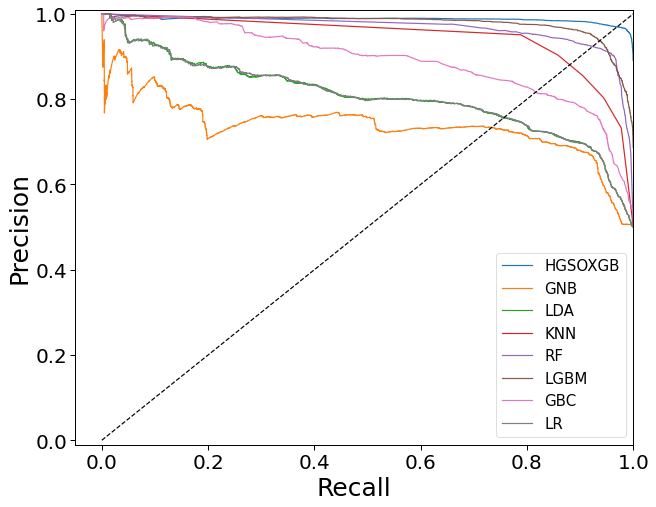

In [69]:
plot_multi_precison_vs_recall_curve(proba_dic, y_test,
                                    'Precision_Recall_Curve_fresh.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


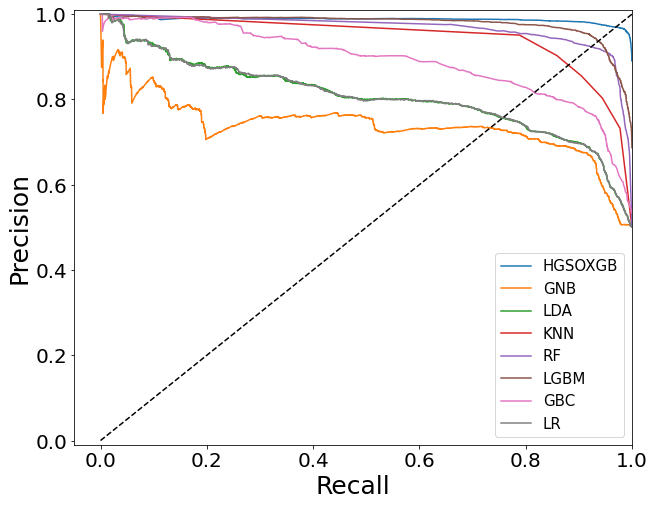

In [17]:
plot_multi_precison_vs_recall_curve(proba_dic, y_test,
                                    'Precision_Recall_Curve_fresh.eps')

In [101]:
from sklearn.model_selection import cross_val_score

xgb_pred = HGSOXGB_clf.predict(x_test_new)

In [102]:
accuracy_score(y_test_new, xgb_pred)

0.9695401449061067

In [103]:
x_train_new = x_train
y_train_new = y_train
x_test_new = x_test
y_test_new = y_test


def est(clf, names):
    estm = []
    for i in range(len(clf)):
        n = names[i]
        claf = clf[i]
        estm.append((n, claf))
    return estm


clf = [HGSOXGB_clf, GBC_clf, LDA_clf, KNN_clf, RF, LGBM, GBC, LR]
name = ['HGSOXGB', 'GNB', 'LDA', 'KNN', 'RF', 'LGBM', 'GBC', 'LR']
est_1 = est(clf, name)
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}

for algorithm, model in est_1:
    y_pred = model.predict(x_test_new)
    y_prob = model.predict_proba(x_test_new)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob

    cross_val_scores[algorithm] = cross_val_score(model,
                                                  x_train_new,
                                                  y_train_new,
                                                  cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test_new, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test_new, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test_new, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test_new, y_pred)
    ppv_scores[algorithm] = precision_score(y_test_new,
                                            y_pred,
                                            average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test_new,
                                                 y_pred,
                                                 average="weighted")
    confusion_matrix_ = confusion_matrix(y_test_new, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP / (FP + TN)).mean()
    specificity_scores[algorithm] = (TN / (TN + FP)).mean()
    threat_scores[algorithm] = (TP / (TP + FN + FP)).mean()
    balanced_accuracy_scores[algorithm] = (
        (sensitivity_scores[algorithm] + specificity_scores[algorithm]) /
        2).mean()
    print('done for one')

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

done for one
done for one
done for one
done for one
done for one
done for one
done for one
done for one


In [105]:
performance_metrics = {
    'Cross_val_scores': cross_val_scores,
    'Accuracy_scores': accuracy_scores,
    'Error_scores': error_scores,
    'F1_scores': f1_scores,
    'FPR_scores': fpr_scores,
    'Kappa_scores': kappa_scores,
    'MCC_scores': mcc_scores,
    'PPV_scores': ppv_scores,
    'Sensitivity_scores': sensitivity_scores,
    'Specificity_scores': specificity_scores,
    'Threat_scores': threat_scores,
    'Balanced_accuracy_scores': balanced_accuracy_scores
}

perfo_m = pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics_final_fresh_1.csv')
perfo_m

,Cross_val_scores,Accuracy_scores,Error_scores,F1_scores,FPR_scores,Kappa_scores,MCC_scores,PPV_scores,Sensitivity_scores,Specificity_scores,Threat_scores,Balanced_accuracy_scores
HGSOXGB,0.972760,0.969540,0.030460,0.969538,0.030466,0.939080,0.939208,0.969669,0.969540,0.969534,0.940877,0.969537
GNB,0.671377,0.664202,0.335798,0.656628,0.335688,0.328552,0.344160,0.680255,0.664202,0.664312,0.490971,0.664257
LDA,0.759068,0.754399,0.245601,0.750629,0.245692,0.508709,0.524727,0.770625,0.754399,0.754308,0.601747,0.754354
KNN,0.877604,0.875869,0.124131,0.875763,0.124153,0.751727,0.752973,0.877111,0.875869,0.875847,0.778999,0.875858
RF,0.927021,0.928952,0.071048,0.928879,0.071072,0.857897,0.859612,0.930665,0.928952,0.928928,0.867208,0.928940
LGBM,0.938820,0.936641,0.063359,0.936639,0.063363,0.873280,0.873318,0.936678,0.936641,0.936637,0.880828,0.936639
GBC,0.825419,0.824634,0.175366,0.823637,0.175421,0.649229,0.656624,0.832051,0.824634,0.824579,0.700359,0.824606
LR,0.758485,0.755878,0.244122,0.754634,0.244175,0.511704,0.516917,0.761092,0.755878,0.755825,0.606256,0.755851


In [21]:
df_pred3=pd.DataFrame(proba_dic)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


HGSOXGB
  AUC: 0.992
GNB
  AUC: 0.783
LDA
  AUC: 0.828
KNN
  AUC: 0.941
RF
  AUC: 0.969
LGBM
  AUC: 0.981
GBC
  AUC: 0.898
LR
  AUC: 0.828


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


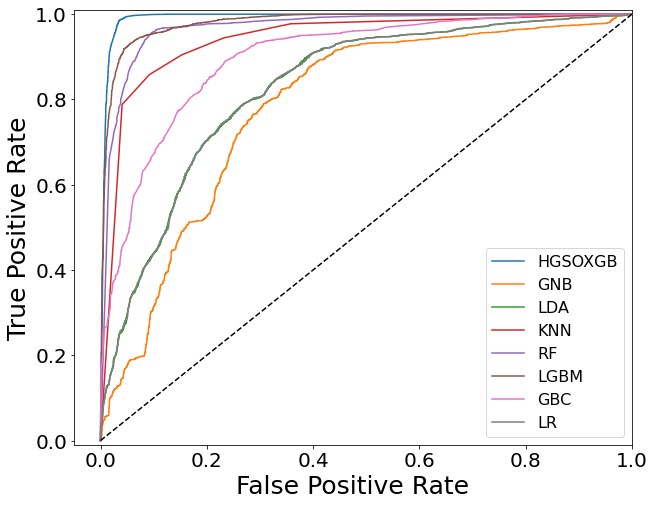

In [22]:
filename = 'ROC_curve__final_fresh.eps'
plot_roc_curves(df_pred3, y_test, filename)

HGSOXGB
  AUC: 0.992
GNB
  AUC: 0.783
LDA
  AUC: 0.828
KNN
  AUC: 0.941
RF
  AUC: 0.969
LGBM
  AUC: 0.981
GBC
  AUC: 0.898
LR
  AUC: 0.828


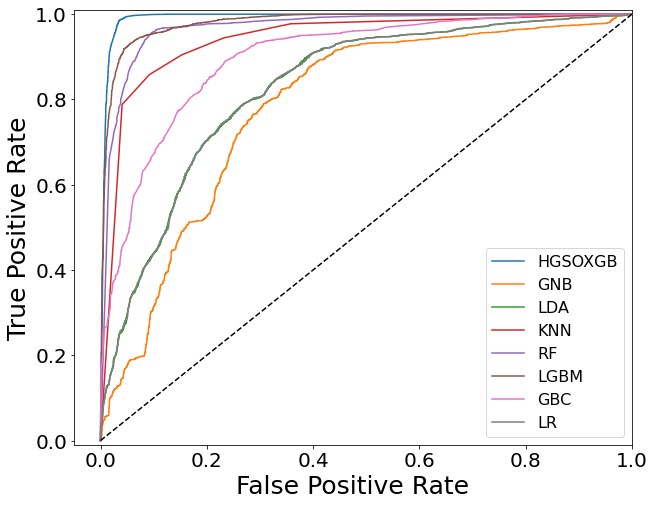

In [23]:
filename = 'ROC_curve__final_fresh.png'
plot_roc_curves(df_pred3, y_test, filename)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
res_df1 = dict(HGSOXGB=cross_val_score(HGSOXGB_clf, x, y, cv=10),
               GNB=cross_val_score(GBC_clf, x, y, cv=10),
               LDA=cross_val_score(LDA_clf, x, y, cv=10),
               KNN=cross_val_score(KNN_clf, x, y, cv=10),
               RF=cross_val_score(RF, x, y, cv=10),
               LGBM=cross_val_score(LGBM, x, y, cv=10),
               GBC=cross_val_score(GBC, x, y, cv=10),
               LR=cross_val_score(LR, x, y, cv=10))

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

In [26]:
res_df3 = pd.DataFrame(res_df1)
res_df3

,HGSOXGB,GNB,LDA,KNN,RF,LGBM,GBC,LR
0,0.974384,0.661625,0.757014,0.891681,0.936570,0.937058,0.822396,0.759210
1,0.978287,0.664796,0.758234,0.899000,0.947548,0.938766,0.822396,0.754818
2,0.977556,0.664064,0.750671,0.889729,0.938278,0.933154,0.818248,0.748231
3,0.977312,0.677726,0.765309,0.906319,0.945109,0.943889,0.834350,0.765065
4,0.973896,0.682849,0.768236,0.899000,0.940229,0.942913,0.835082,0.769456
5,0.972432,0.657477,0.750427,0.891925,0.936326,0.934130,0.815077,0.745304
6,0.978282,0.684236,0.766471,0.898731,0.949732,0.945827,0.838946,0.773060
7,0.972914,0.662274,0.739873,0.890678,0.938507,0.937531,0.815276,0.750122
8,0.978282,0.672035,0.750854,0.889946,0.939971,0.938995,0.811859,0.753294
9,0.977062,0.653734,0.765739,0.891410,0.939971,0.941923,0.835286,0.762323


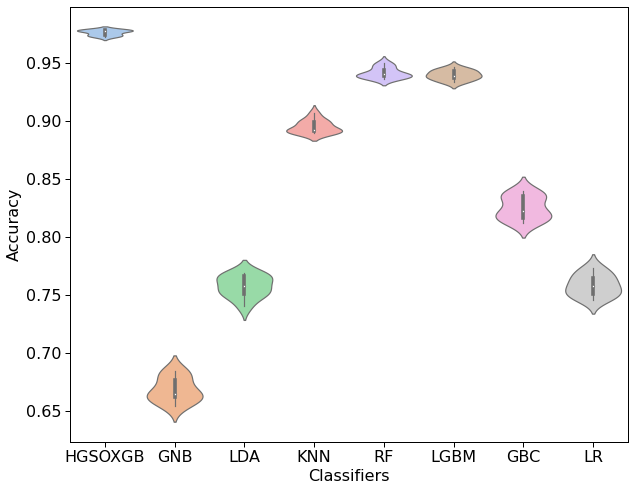

In [94]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel('Classifiers', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
sns.violinplot(ax=ax,
               data=res_df3.iloc[:, 0:8],
               palette='pastel',
               scale='width')
plt.savefig('violin_plot_fresh.eps', dpi=600)

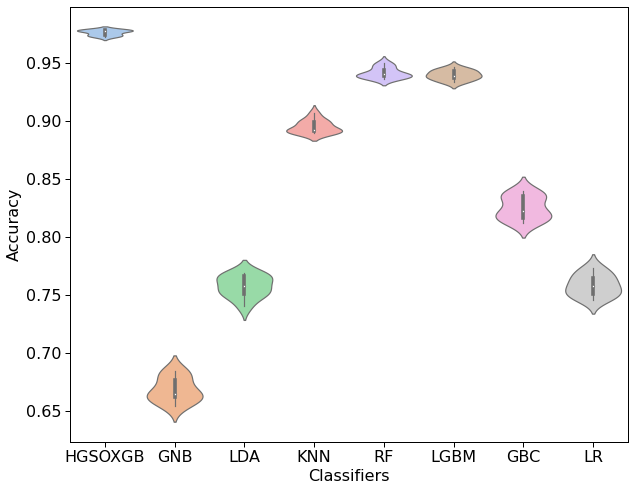

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel('Classifiers', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
sns.violinplot(ax=ax,
               data=res_df3.iloc[:, 0:8],
               palette='pastel',
               scale='width')
plt.savefig('violin_plot_fresh.png', dpi=600)

In [29]:
proba_R_D_curve = dict(HGSOXGB=HGSOXGB_clf.predict_proba(x_test),
                       GNB=GBC_clf.predict_proba(x_test),
                       LDA=LDA_clf.predict_proba(x_test),
                       KNN=KNN_clf.predict_proba(x_test),
                       RF=RF.predict_proba(x_test),
                       LGBM=LGBM.predict_proba(x_test),
                       GBC=GBC.predict_proba(x_test),
                       LR=LR.predict_proba(x_test))

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metr

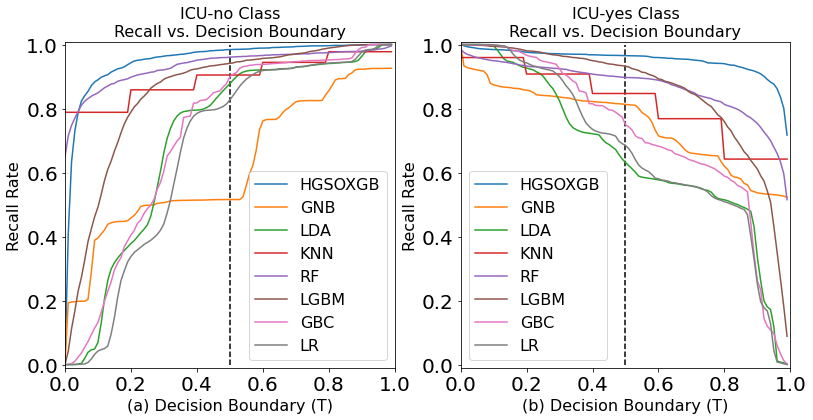

In [30]:
filename = 'multi_recall_vs_decision_boundary.png'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test, filename)

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metr

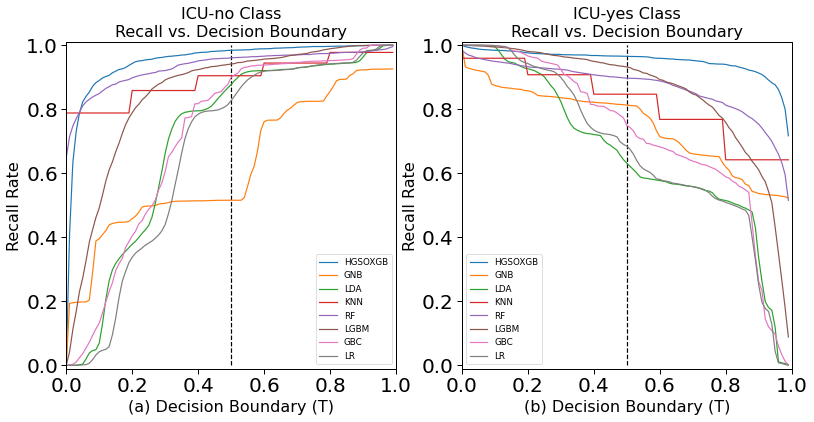

In [88]:
filename = 'multi_recall_vs_decision_boundary.eps'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test, filename)

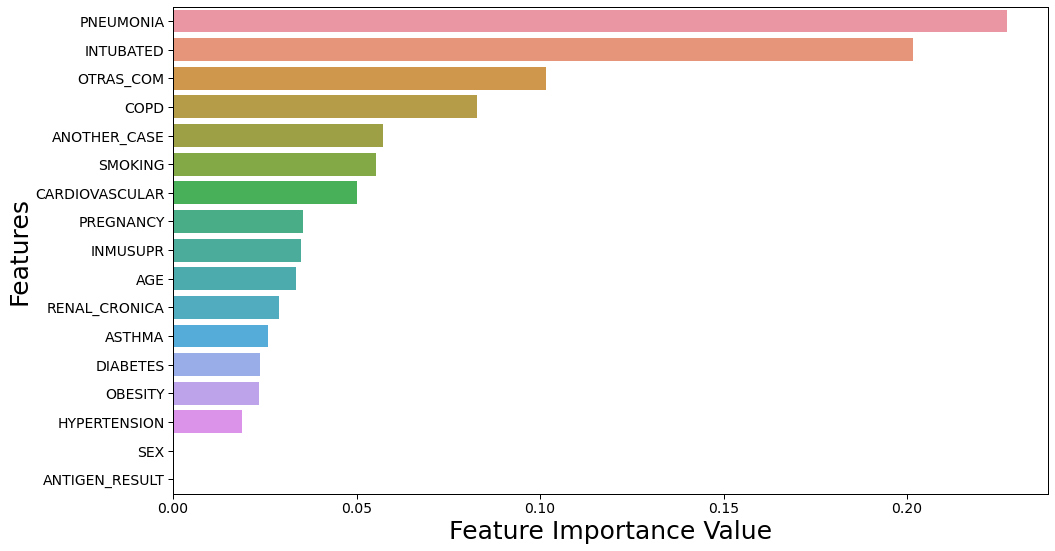

In [32]:
sns.set_context("paper",
                rc={
                    "font.size": 18,
                    "axes.titlesize": 20,
                    "axes.labelsize": 20
                })

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 18})

feature_imp = pd.DataFrame(sorted(
    zip(HGSOXGB_clf.feature_importances_, x_test.columns)),
                           columns=['Feature Importance Value', 'Features'])
params = {'axes.labelsize': 25}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=15)
sns.barplot(x="Feature Importance Value",
            y="Features",
            data=feature_imp.sort_values(by="Feature Importance Value",
                                         ascending=False))


plt.tight_layout()

plt.savefig('icu_importances_fresh.png', dpi=600)
plt.show()

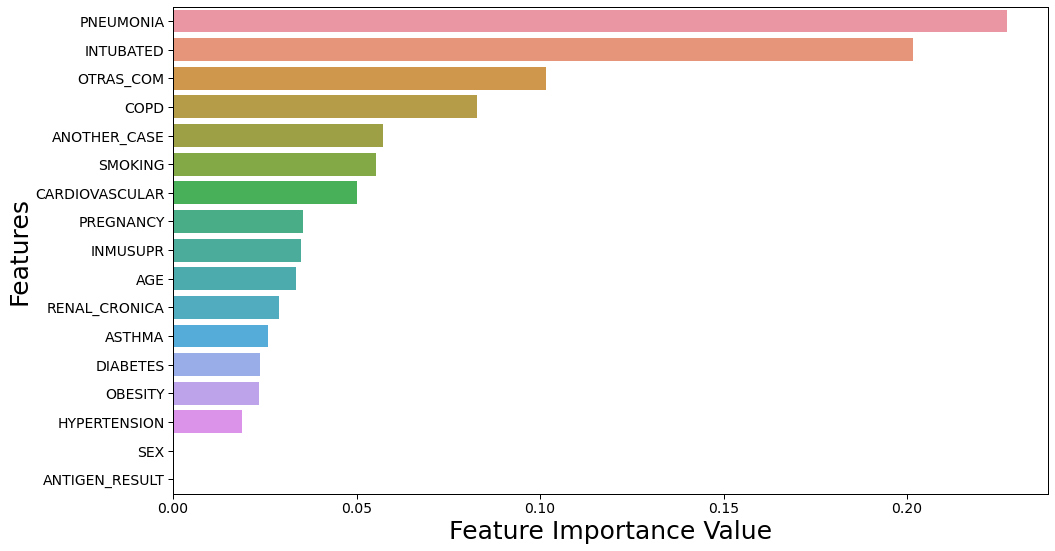

In [43]:
sns.set_context("paper",
                rc={
                    "font.size": 18,
                    "axes.titlesize": 20,
                    "axes.labelsize": 20
                })

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 18})

feature_imp = pd.DataFrame(sorted(
    zip(HGSOXGB_clf.feature_importances_, x_test.columns)),
                           columns=['Feature Importance Value', 'Features'])
params = {'axes.labelsize': 25}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=15)
sns.barplot(x="Feature Importance Value",
            y="Features",
            data=feature_imp.sort_values(by="Feature Importance Value",
                                         ascending=False))

plt.tight_layout()

plt.savefig('icu_importances_fresh.eps', dpi=600)
plt.show()

In [34]:
from pycm import *

In [35]:
pred_arr = np.load('pred_npy_covid_icu.npy')
test_arr = np.load('test_npy_covid_icu.npy')

In [36]:
cm = ConfusionMatrix(test_arr, pred_arr)

In [37]:
test_arr.shape

(13526,)

In [38]:
pred_arr.shape

(13526,)

In [115]:
df_performance = pd.read_csv('performance_metrics_final_fresh_1.csv')
df_performance

,Unnamed: 0,Cross_val_scores,Accuracy_scores,Error_scores,F1_scores,FPR_scores,Kappa_scores,MCC_scores,PPV_scores,Sensitivity_scores,Specificity_scores,Threat_scores,Balanced_accuracy_scores,AUC
0,HGSOXGB,0.972760,0.969540,0.030460,0.969538,0.030466,0.939080,0.939208,0.969669,0.969540,0.969534,0.940877,0.969537,0.992
1,GNB,0.671377,0.664202,0.335798,0.656628,0.335688,0.328552,0.344160,0.680255,0.664202,0.664312,0.490971,0.664257,0.783
2,LDA,0.759068,0.754399,0.245601,0.750629,0.245692,0.508709,0.524727,0.770625,0.754399,0.754308,0.601747,0.754354,0.828
3,KNN,0.877604,0.875869,0.124131,0.875763,0.124153,0.751727,0.752973,0.877111,0.875869,0.875847,0.778999,0.875858,0.941
4,RF,0.927021,0.928952,0.071048,0.928879,0.071072,0.857897,0.859612,0.930665,0.928952,0.928928,0.867208,0.928940,0.969
5,LGBM,0.938820,0.936641,0.063359,0.936639,0.063363,0.873280,0.873318,0.936678,0.936641,0.936637,0.880828,0.936639,0.981
6,GBC,0.825419,0.824634,0.175366,0.823637,0.175421,0.649229,0.656624,0.832051,0.824634,0.824579,0.700359,0.824606,0.898
7,LR,0.758485,0.755878,0.244122,0.754634,0.244175,0.511704,0.516917,0.761092,0.755878,0.755825,0.606256,0.755851,0.828


In [116]:
df_performance1 = df_performance.T
df_performance1

,0,1,2,3,4,5,6,7
Unnamed: 0,HGSOXGB,GNB,LDA,KNN,RF,LGBM,GBC,LR
Cross_val_scores,0.97276,0.671377,0.759068,0.877604,0.927021,0.93882,0.825419,0.758485
Accuracy_scores,0.96954,0.664202,0.754399,0.875869,0.928952,0.936641,0.824634,0.755878
Error_scores,0.03046,0.335798,0.245601,0.124131,0.071048,0.063359,0.175366,0.244122
F1_scores,0.969538,0.656628,0.750629,0.875763,0.928879,0.936639,0.823637,0.754634
FPR_scores,0.030466,0.335688,0.245692,0.124153,0.071072,0.063363,0.175421,0.244175
Kappa_scores,0.93908,0.328552,0.508709,0.751727,0.857897,0.87328,0.649229,0.511704
MCC_scores,0.939208,0.34416,0.524727,0.752973,0.859612,0.873318,0.656624,0.516917
PPV_scores,0.969669,0.680255,0.770625,0.877111,0.930665,0.936678,0.832051,0.761092
Sensitivity_scores,0.96954,0.664202,0.754399,0.875869,0.928952,0.936641,0.824634,0.755878


In [117]:
df_performance1 = df_performance1.rename(columns=df_performance1.iloc[0]).drop(
    df_performance1.index[0])

In [118]:
df_performance1.drop(index=[
    'Cross_val_scores', 'Error_scores', 'FPR_scores', 'PPV_scores',
    'Specificity_scores', 'Threat_scores', 'Balanced_accuracy_scores'
],
                     inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


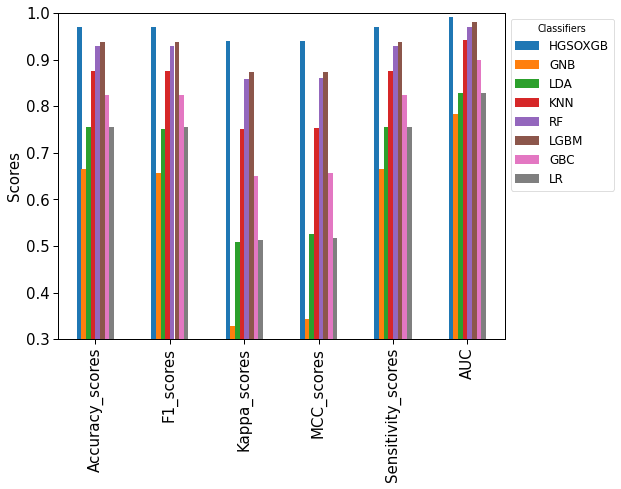

In [119]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
df_performance1.plot.bar(figsize=[8, 6], rot=90)
plt.ylim(.3, 1)
plt.ylabel('Scores', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Classifiers',
           bbox_to_anchor=(1, 1),
           loc='upper left',
           fontsize=12)
plt.savefig('performance.eps', bbox_inches='tight', dpi=600)

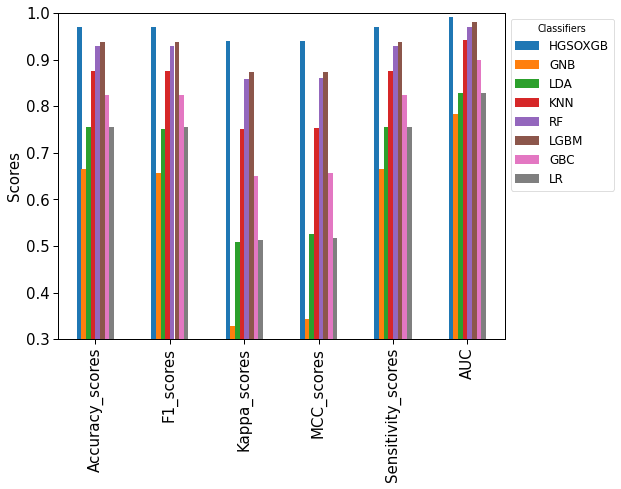

In [120]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
df_performance1.plot.bar(figsize=[8, 6], rot=90)
plt.ylim(.3, 1)
plt.ylabel('Scores', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Classifiers',
           bbox_to_anchor=(1, 1),
           loc='upper left',
           fontsize=12)
plt.savefig('performance.png', bbox_inches='tight', dpi=600)

In [55]:
X_train1 = x_train.reset_index(drop=True)
y_train1 = y_train.reset_index(drop=True)
X_test1 = x_test.reset_index(drop=True)
y_test1 = y_test.reset_index(drop=True)

results_org = bootstrap_model(
    HGSOXGB_clf,
    X_train1,
    y_train1,
    X_test1,
    y_test1,
    100,  # change the number of bootstraps here
    0.5)

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dodul\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


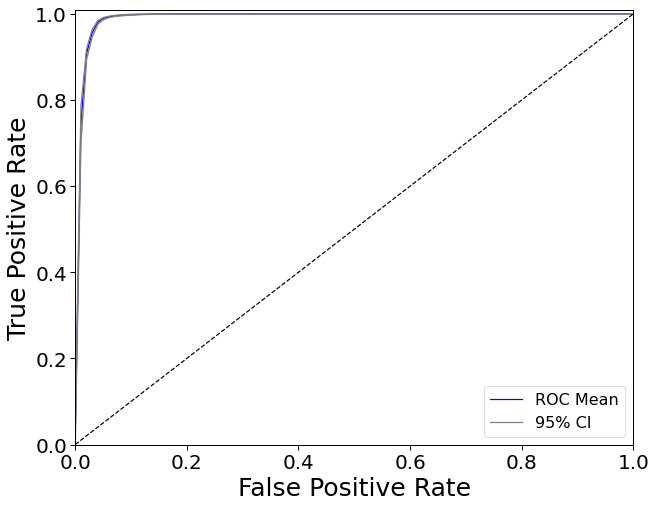

In [56]:
total_auc_org = []
for r in results_org['fpr_tpr']:
    total_auc_org.append(auc(r[0], r[1]))
total_auc_org
df_interp_org = pd.DataFrame(roc_interp(results_org['fpr_tpr'])).T
m_org = df_interp_org.mean(axis=1).values.tolist()
ci_org = df_interp_org.quantile([.025, .975], axis=1).values.tolist()

filename_bootstrap_org = 'Bootstrap_ROC_ICU_fresh.eps'
plot_bootstrap_roc(m_org, ci_org, filename_bootstrap_org)

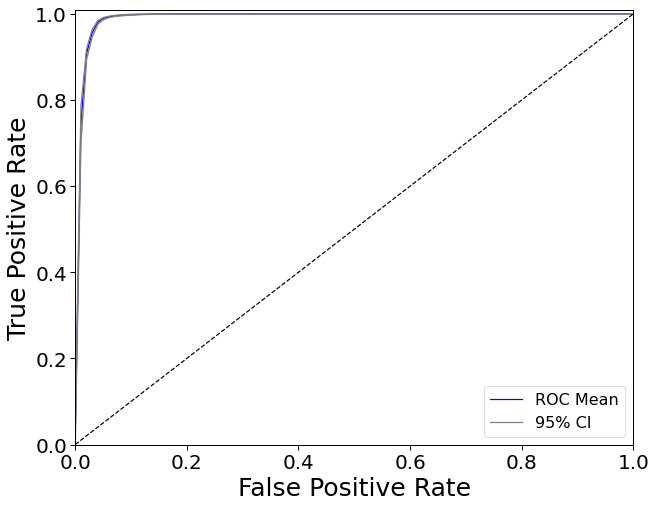

In [57]:
total_auc_org = []
for r in results_org['fpr_tpr']:
    total_auc_org.append(auc(r[0], r[1]))
total_auc_org
df_interp_org = pd.DataFrame(roc_interp(results_org['fpr_tpr'])).T
m_org = df_interp_org.mean(axis=1).values.tolist()
ci_org = df_interp_org.quantile([.025, .975], axis=1).values.tolist()

filename_bootstrap_org = 'Bootstrap_ROC_ICU_fresh.png'
plot_bootstrap_roc(m_org, ci_org, filename_bootstrap_org)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


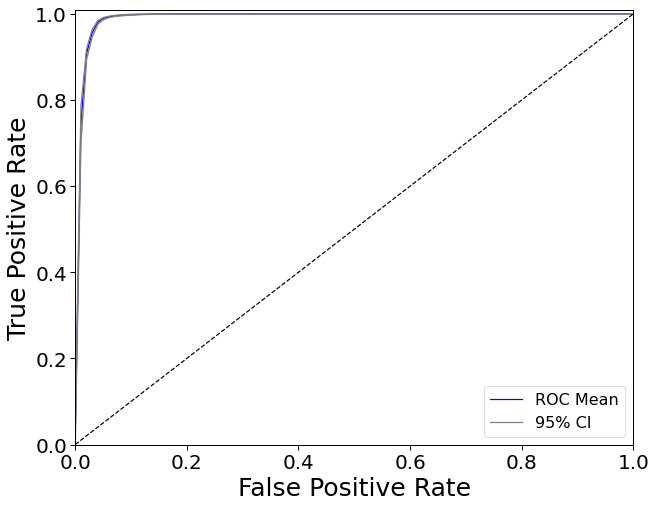

In [58]:
filename_bootstrap_org = 'Bootstrap_ROC_ICU_fresh.eps'
plot_bootstrap_roc(m_org, ci_org, filename_bootstrap_org)

In [59]:
%run confusion_matrix_pretty_print.ipynb

In [96]:
y_pred_xgb = HGSOXGB_clf.predict(x_test)
y_pred_gnb = GBC_clf.predict(x_test)
y_pred_lda = LDA_clf.predict(x_test)
y_pred_knn = KNN_clf.predict(x_test)
y_pred_lgbm = LGBM.predict(x_test)
y_pred_gbc = GBC.predict(x_test)
y_pred_lr = LR.predict(x_test)

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


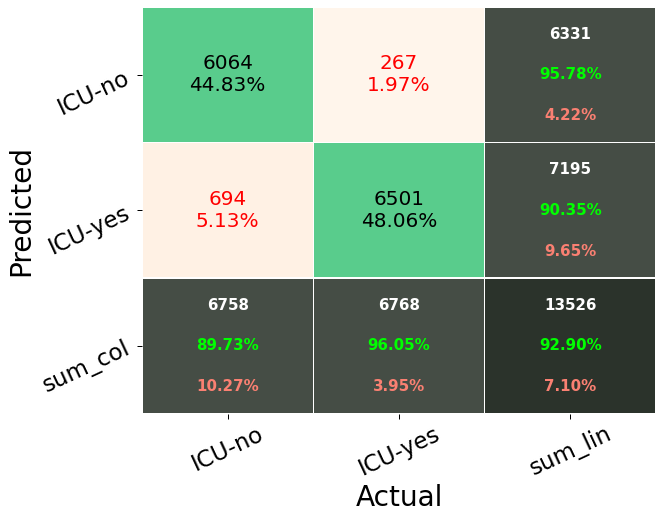

In [113]:
y_pred_rf = RF.predict(x_test_new)
plot_confusion_matrix_from_data(y_test,
                                y_pred_rf,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_RF_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


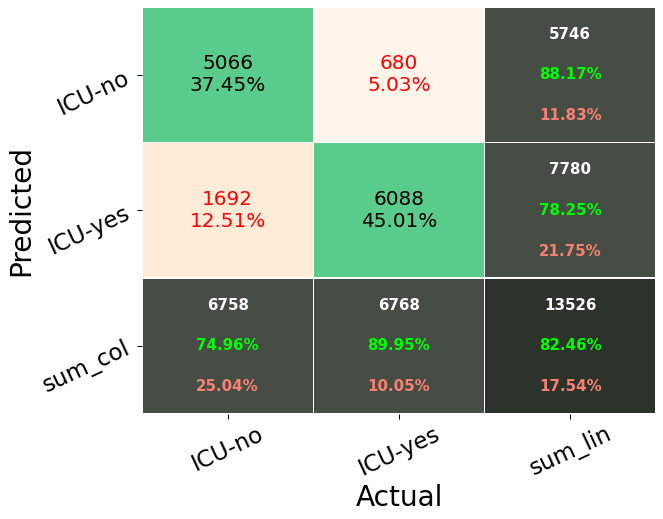

In [72]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gbc,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_GNC_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


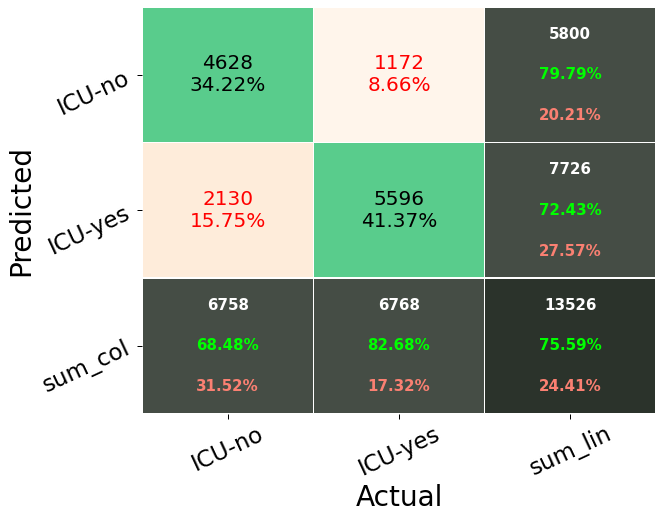

In [73]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lr,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_LR_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


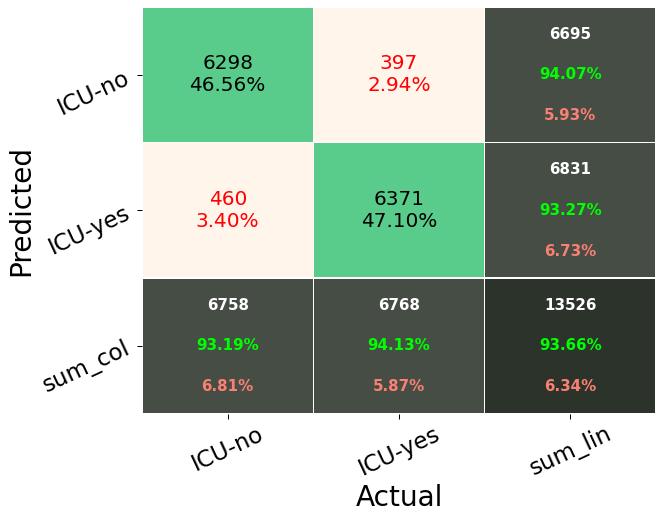

In [74]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lgbm,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_LGBM_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


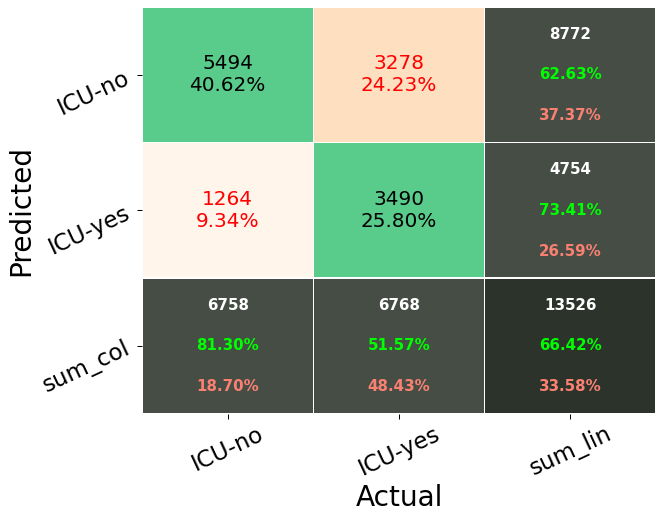

In [75]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gnb,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_GNB_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


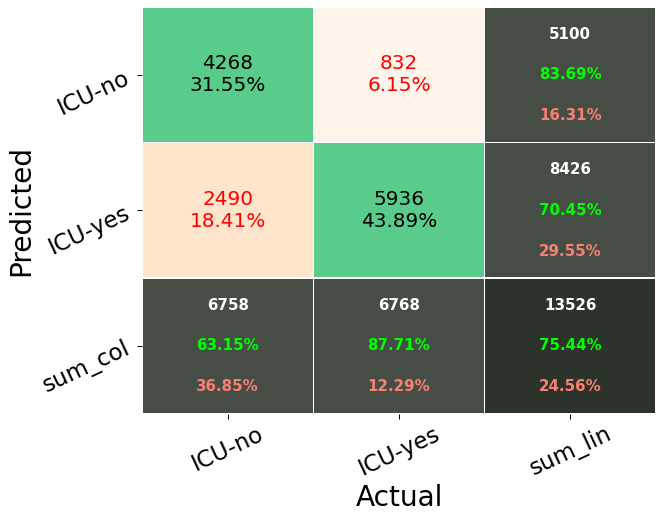

In [76]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lda,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_LDA_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


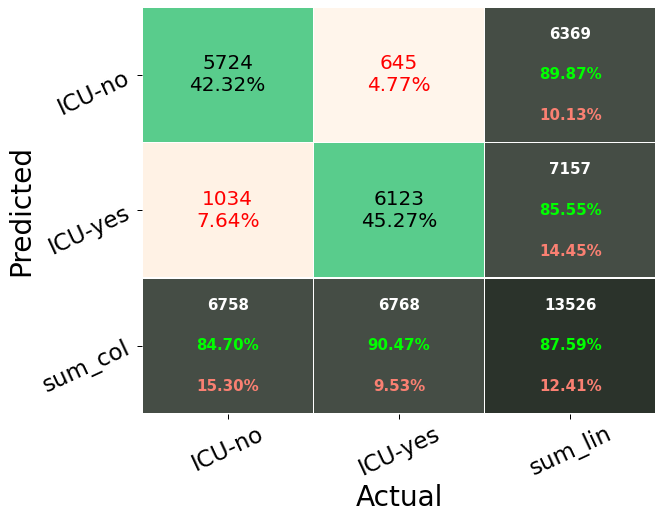

In [77]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_knn,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_KNN_CM.eps',
                                figsize=[10, 8])

<ipython-input-59-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


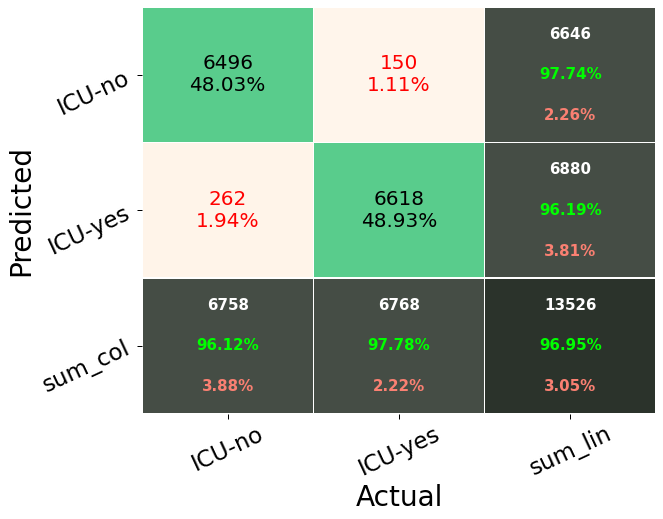

In [97]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_xgb,
                                columns=['ICU-no', 'ICU-yes'],
                                fz=20,
                                filename='ICU_XGB_CM.eps',
                                figsize=[10, 8])

In [98]:
accuracy_score(y_test, y_pred_xgb)

0.9695401449061067

In [79]:
from pycm import *

In [87]:
cm = ConfusionMatrix(
    actual_vector=np.array(y_test),
    predict_vector=np.array(y_pred_gnb))  # Create CM From Data

print(cm)

Predict    0          1          
Actual
0          5494       1264       

1          3278       3490       





Overall Statistics : 

95% CI                                                            (0.65624,0.67216)
ACC Macro                                                         0.6642
ARI                                                               0.10779
AUNP                                                              0.66431
AUNU                                                              0.66431
Bangdiwala B                                                      0.46322
Bennett S                                                         0.3284
CBA                                                               0.57099
CSI                                                               0.34453
Chi-Squared                                                       1602.09996
Chi-Squared DF                                                    1
Conditional Entropy                        